In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [3]:
#Read input as dataframe

data = pd.read_csv("credit-card-data.csv")

In [4]:
d1=data
d2=data
d3=data

In [5]:
# Remove column 'CUST_ID' 
X=data.drop(['CUST_ID'], axis = 1)

In [6]:
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
X.isnull().sum()
X=X.dropna()

In [9]:
X.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

In [11]:
#Adding new columns

X['MONTHLY_AVG_PURCHASE'] = X['PURCHASES']/X['TENURE']
X['MONTHLY_CASH_ADVANCE'] = X['CASH_ADVANCE']/X['TENURE']
X['LIMIT_USAGE'] = X['BALANCE']/X['CREDIT_LIMIT']
X['PAYMENT_RATIO']= X['PAYMENTS']/X['MINIMUM_PAYMENTS']

In [12]:
Y=X
Z=X

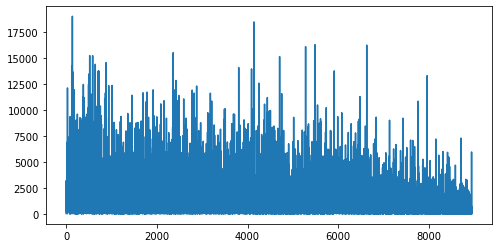

In [13]:
X['BALANCE'].plot(figsize=(8,4))

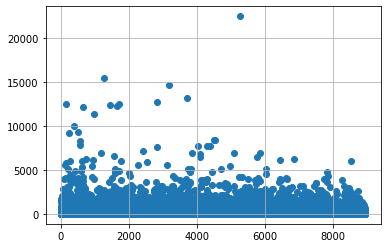

In [14]:
plt.scatter(X.index,X['INSTALLMENTS_PURCHASES'])
plt.grid()

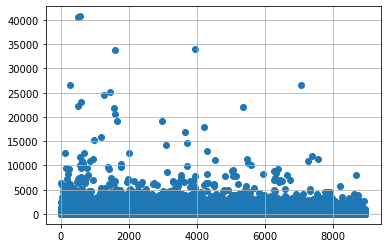

In [15]:
plt.scatter(X.index,X['ONEOFF_PURCHASES'])
plt.grid()

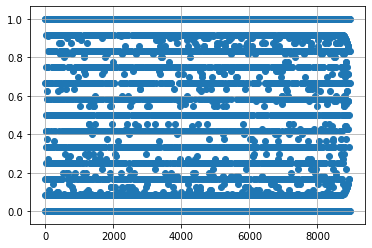

In [16]:
plt.scatter(X.index,X['PURCHASES_FREQUENCY'])
plt.grid()

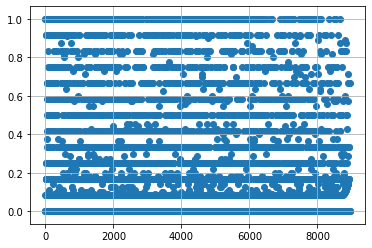

In [17]:
plt.scatter(X.index,X['ONEOFF_PURCHASES_FREQUENCY'])
plt.grid()

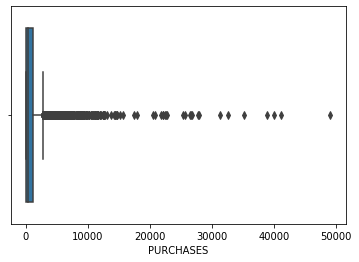

In [18]:
sns.boxplot(X['PURCHASES'])

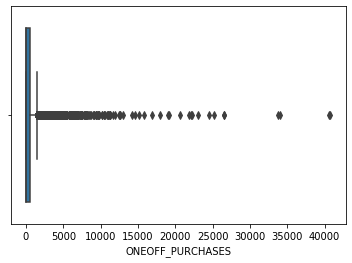

In [19]:
sns.boxplot(X['ONEOFF_PURCHASES'])

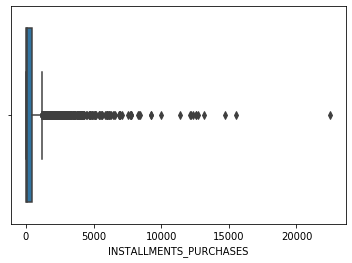

In [20]:
sns.boxplot(X['INSTALLMENTS_PURCHASES'])

In [21]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [23]:
vif

,VIF,Features
0,3.379189,BALANCE
1,1.451310,BALANCE_FREQUENCY
2,47972.810339,PURCHASES
3,28887.337356,ONEOFF_PURCHASES
4,8556.226774,INSTALLMENTS_PURCHASES
5,33.285775,CASH_ADVANCE
6,10.738033,PURCHASES_FREQUENCY
7,3.926818,ONEOFF_PURCHASES_FREQUENCY
8,9.366542,PURCHASES_INSTALLMENTS_FREQUENCY
9,3.579335,CASH_ADVANCE_FREQUENCY


In [24]:
#REmoving 'PURCHASES' and 'PURCHASES_FREQUENCY' to avoid multi-colinearity problem
X=X.drop(['PURCHASES','PURCHASES_FREQUENCY'],axis=1)

In [25]:
#Now adding the categorical column

def purchase(X):
    if (X['ONEOFF_PURCHASES']==0) & (X['INSTALLMENTS_PURCHASES']==0):
        return 'NONE'
    if (X['ONEOFF_PURCHASES']>0) & (X['INSTALLMENTS_PURCHASES']>0):
         return 'BOTH'
    if (X['ONEOFF_PURCHASES']>0) & (X['INSTALLMENTS_PURCHASES']==0):
        return 'ONEOFF'
    if (X['ONEOFF_PURCHASES']==0) & (X['INSTALLMENTS_PURCHASES']>0):
        return 'INSTALLAMENT'

In [26]:
X['PURCHASE_TYPE']=X.apply(purchase,axis=1)
X['PURCHASE_TYPE'].value_counts()

BOTH            2741
INSTALLAMENT    2148
NONE            1965
ONEOFF          1782
Name: PURCHASE_TYPE, dtype: int64

In [27]:
X1=X
X2=X

In [28]:
#Changing the Catrgorical values into numerical using dummies method

dummy = pd.get_dummies(X['PURCHASE_TYPE'])

In [29]:
dummy.isnull().sum()

BOTH            0
INSTALLAMENT    0
NONE            0
ONEOFF          0
dtype: int64

In [30]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BOTH          8636 non-null   uint8
 1   INSTALLAMENT  8636 non-null   uint8
 2   NONE          8636 non-null   uint8
 3   ONEOFF        8636 non-null   uint8
dtypes: uint8(4)
memory usage: 101.2 KB


In [31]:
#Concatenation dummy with main table

df = pd.concat([X, dummy], axis=1, sort=False)

In [32]:
#Dropping PURCHASE_TYPE as they were converted into numeric columns

df=df.drop(['PURCHASE_TYPE'], axis = 1) 

In [33]:
df.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,...,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_RATIO,BOTH,INSTALLAMENT,NONE,ONEOFF
0,40.900749,0.818182,0.00,95.40,0.000000,0.000000,0.083333,0.00,0,2,...,0.000000,12,7.950000,0.000000,0.040901,1.446508,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.25,4,0,...,0.222222,12,0.000000,536.912124,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,0.000000,0.00,0,12,...,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.000000,0.00,0,1,...,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,0,0,1
5,1809.828751,1.000000,0.00,1333.28,0.000000,0.000000,0.583333,0.00,0,8,...,0.000000,12,111.106667,0.000000,1.005460,0.581601,0,1,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   ONEOFF_PURCHASES                  8636 non-null   float64
 3   INSTALLMENTS_PURCHASES            8636 non-null   float64
 4   CASH_ADVANCE                      8636 non-null   float64
 5   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 6   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 7   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 8   CASH_ADVANCE_TRX                  8636 non-null   int64  
 9   PURCHASES_TRX                     8636 non-null   int64  
 10  CREDIT_LIMIT                      8636 non-null   float64
 11  PAYMENTS                          8636 non-null   float64
 12  MINIMU

In [35]:
df_scaled = scaler.fit_transform(df)

In [36]:
df1_scaled=df_scaled
df2_scaled=df_scaled

In [38]:
df_scaled.shape

(8636, 23)

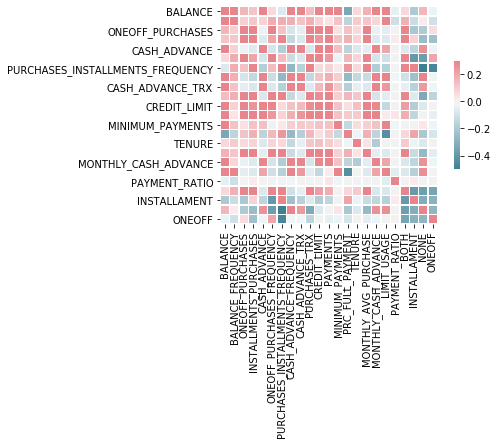

In [41]:
corr = df.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

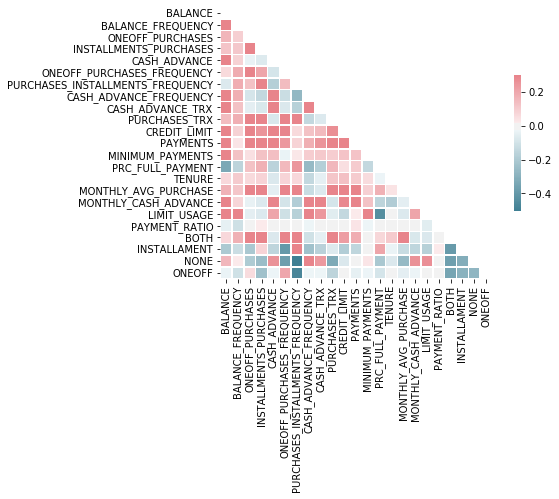

In [42]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

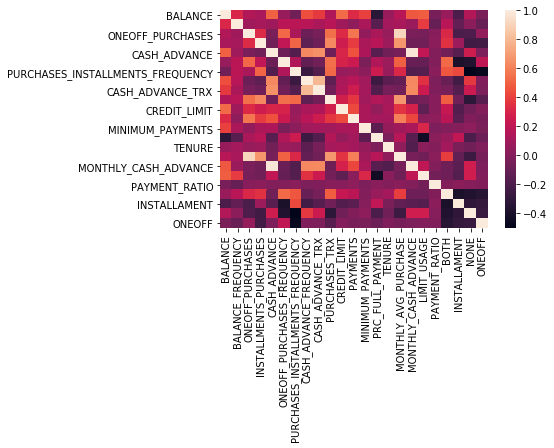

In [43]:
sns.heatmap(df.corr())

In [44]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=23)
df_pca=pca.fit(df_scaled)
sum(df_pca.explained_variance_ratio_)

1.0

In [45]:
var_ratio={}
for n in range(2,24):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [46]:
var_ratio

{2: 0.4030845053435549,
 3: 0.49031399687440747,
 4: 0.5695481153785897,
 5: 0.6268312014492607,
 6: 0.6778022096554859,
 7: 0.7245351621872129,
 8: 0.7674892998022118,
 9: 0.8051632951441628,
 10: 0.8371027554059428,
 11: 0.8684975945821268,
 12: 0.8947949348145922,
 13: 0.9185201262266095,
 14: 0.9378169628709548,
 15: 0.9555995558486248,
 16: 0.966760521233632,
 17: 0.9772913874449152,
 18: 0.9849893143768921,
 19: 0.9924332893492287,
 20: 0.9991593059358191,
 21: 0.9998491227136102,
 22: 1.0,
 23: 1.0}

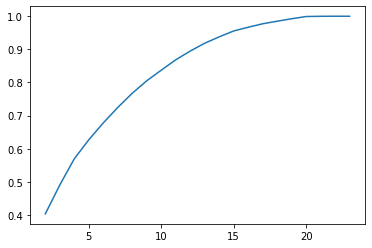

In [47]:
pd.Series(var_ratio).plot()

In [48]:
pca=PCA(n_components=10)
new_data=pca.fit_transform(df_scaled)
principal_df=pd.DataFrame(new_data,columns=['PC1','PC2','P3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [76]:
principal_df

,PC1,PC2,P3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.930025,-2.240481,0.695747,-0.325406,0.684075,-0.130346,0.070887,-0.166012,-0.517329,-0.312490
1,-2.206477,2.826313,0.377336,-1.310360,0.080941,0.764126,1.068743,-0.764986,0.226197,0.486258
2,0.478279,-0.208616,-2.949453,0.697110,0.513762,-1.548309,0.284428,0.131886,0.033098,0.994186
3,-1.225728,-1.148051,-1.757726,1.026109,0.768133,-0.723652,-0.425670,0.182142,-0.830412,-0.100629
4,0.021058,-0.865947,1.843123,1.554812,1.623770,-0.093210,-0.614308,0.133694,-0.627508,-0.153200
...,...,...,...,...,...,...,...,...,...,...
8631,-1.511755,-2.100821,-2.030165,-1.652131,0.055624,-0.193495,-3.118249,1.216879,2.424899,-0.343516
8632,-0.227866,-2.405586,1.895628,-1.367313,-0.373292,-0.129027,-3.354382,0.578234,1.458482,1.761406
8633,-0.657672,-2.444917,1.546895,-1.387137,-0.205502,-0.024451,-3.212016,0.743119,1.793759,1.104346
8634,-2.115304,-1.274998,-0.280595,-1.135778,-1.139274,2.169244,-2.736611,0.239539,2.130494,1.069125


In [47]:
principal_df.shape

(8636, 10)

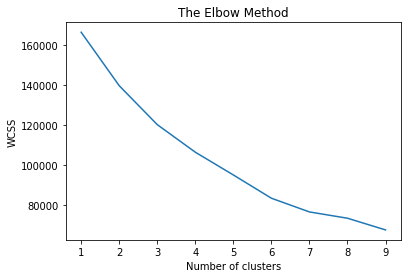

In [48]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(principal_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 123)
kmeans.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [50]:
kmeans.labels_

array([5, 4, 2, ..., 5, 1, 2])

In [51]:
pd.Series(kmeans.labels_).value_counts()

0    2357
5    2045
1    1717
2    1620
4     691
3     206
dtype: int64

In [52]:
from sklearn import metrics

In [53]:
# calculate SC for K=3 through K=12
k_range = range(2,12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(df_scaled)
    scores.append(metrics.silhouette_score(df_scaled, km.labels_))

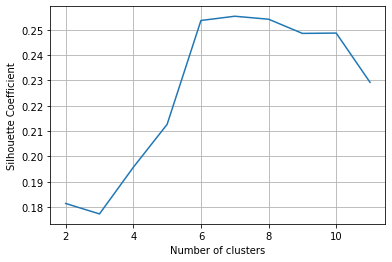

In [54]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [55]:
scores

[0.18146934510117033,
 0.17734797545928538,
 0.19572848295430154,
 0.21267644065402663,
 0.25364183212032826,
 0.25531390611851884,
 0.25414327030169775,
 0.24854816900112456,
 0.2486738930798166,
 0.22924832467769407]

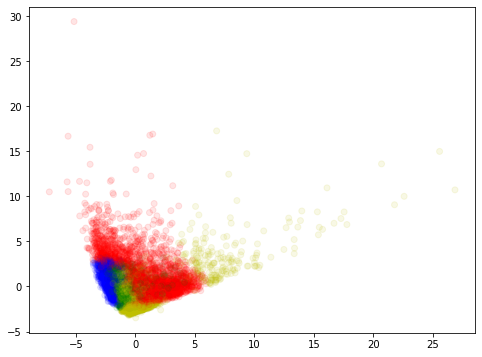

In [56]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'r',5:'y'}
label_color=[color_map[l] for l in kmeans.labels_]
plt.figure(figsize=(8,6))
plt.scatter(new_data[:,0],new_data[:,1],c=label_color,cmap='Spectral',alpha=0.1)

In [57]:
df_pair_plot=pd.DataFrame(new_data,columns=['PC_' +str(i) for i in range(10)])
df_pair_plot['Cluster']=kmeans.labels_
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,Cluster
0,-0.930025,-2.240481,0.695747,-0.325406,0.684075,-0.130346,0.070887,-0.166012,-0.517329,-0.312490,5
1,-2.206477,2.826313,0.377336,-1.310360,0.080941,0.764126,1.068743,-0.764986,0.226197,0.486258,4
2,0.478279,-0.208616,-2.949453,0.697110,0.513762,-1.548309,0.284428,0.131886,0.033098,0.994186,2
3,-1.225728,-1.148051,-1.757726,1.026109,0.768133,-0.723652,-0.425670,0.182142,-0.830412,-0.100629,2
4,0.021058,-0.865947,1.843123,1.554812,1.623770,-0.093210,-0.614308,0.133694,-0.627508,-0.153200,5


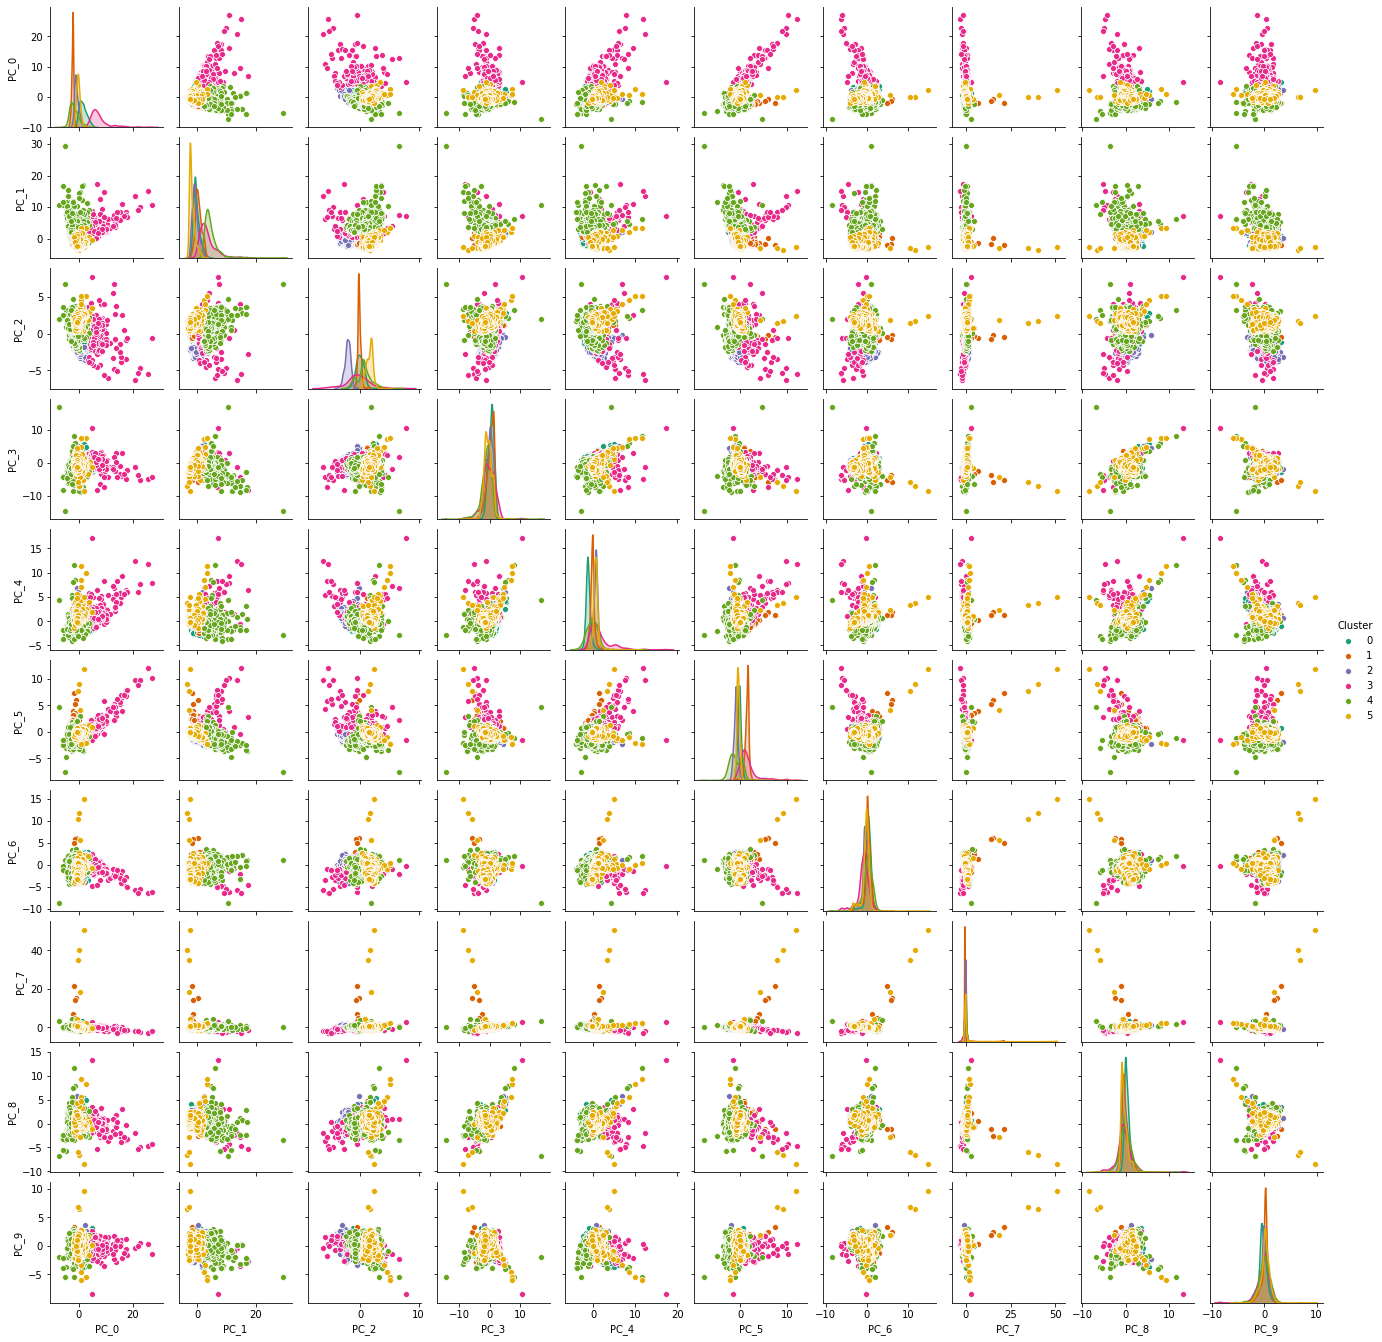

In [59]:
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',height=1.85)

In [60]:
labels=kmeans.labels_

In [61]:
labels=labels.tolist()

In [62]:
labels=pd.Series(data=labels,index=range(len(labels)))

In [69]:
labels_x=list() #Extracting the various clusters formed
for i in range(10):
    labels_x.append(labels[labels.values==i])

In [70]:
principal_df.iloc[labels_x[0].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2357.0,1.732656,1.351618,-0.946804,0.684870,1.556788,2.626012,5.949523
PC2,2357.0,-0.147057,1.104647,-2.359828,-0.894250,-0.393627,0.431985,4.636297
P3,2357.0,-0.038197,0.674405,-2.300377,-0.495771,-0.040114,0.438378,2.764265
PC4,2357.0,0.530384,0.995896,-3.305319,-0.180384,0.622369,1.219508,5.541751
PC5,2357.0,-1.123618,0.585584,-3.098025,-1.470961,-1.181886,-0.852647,4.853033
PC6,2357.0,-0.112166,0.400958,-1.648340,-0.360778,-0.114206,0.125478,1.602734
PC7,2357.0,0.338219,0.770443,-3.702387,-0.001938,0.390092,0.786571,2.867506
PC8,2357.0,0.134404,0.359890,-0.962136,-0.063576,0.152337,0.347221,3.190725
PC9,2357.0,0.352057,0.651092,-1.737028,-0.062105,0.241843,0.673065,5.344471
PC10,2357.0,-0.238378,0.709975,-3.708980,-0.630680,-0.288575,0.184094,3.205335


In [71]:
principal_df.iloc[labels_x[1].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,1717.0,-2.118367,0.395114,-3.541580,-2.344804,-2.076169,-1.893783,-0.031385
PC2,1717.0,0.488541,1.057752,-2.112276,-0.276708,0.339689,1.174740,3.230227
P3,1717.0,-0.120606,0.286636,-0.888448,-0.291112,-0.163863,0.020465,1.643059
PC4,1717.0,0.319866,1.190483,-5.699661,-0.345327,0.519982,1.235966,4.658893
PC5,1717.0,-0.141179,0.562159,-2.539776,-0.417478,-0.137434,0.085457,5.102622
PC6,1717.0,1.524835,0.474006,-1.129849,1.313300,1.583387,1.761651,7.335459
PC7,1717.0,0.165144,0.985828,-3.529473,-0.018158,0.274035,0.699744,6.202983
PC8,1717.0,-0.336105,0.841071,-1.434027,-0.557514,-0.437231,-0.319322,21.403959
PC9,1717.0,0.039699,0.830475,-2.516997,-0.522359,-0.164708,0.435840,4.717758
PC10,1717.0,0.180265,0.680721,-2.798930,-0.055422,0.250483,0.531731,3.281289


In [77]:
principal_df.iloc[labels_x[2].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,1620.0,-0.558381,0.972284,-2.465732,-1.208986,-0.778198,-0.114529,4.390977
PC2,1620.0,-0.563440,1.084246,-2.431531,-1.317437,-0.773385,0.034953,3.197898
P3,1620.0,-2.122861,0.493160,-3.919088,-2.409628,-2.087534,-1.776233,-0.147174
PC4,1620.0,-0.131655,1.164019,-3.614515,-1.056501,0.035137,0.737277,5.208853
PC5,1620.0,0.724603,0.591426,-1.354370,0.387874,0.719028,0.994834,6.913562
PC6,1620.0,-0.849363,0.433234,-2.553381,-1.111620,-0.840359,-0.599343,1.194357
PC7,1620.0,-0.330953,0.968686,-4.074274,-0.636315,-0.241530,0.275769,2.639597
PC8,1620.0,0.178381,0.369330,-1.114754,-0.014063,0.186150,0.322104,1.707184
PC9,1620.0,-0.197111,0.821104,-2.386697,-0.773116,-0.339493,0.248254,5.727051
PC10,1620.0,-0.042853,0.897148,-3.269503,-0.413100,0.006323,0.479227,3.579459


In [78]:
principal_df.iloc[labels_x[3].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,206.0,7.769042,3.825516,3.411586,5.411055,6.659412,8.338745,26.860604
PC2,206.0,3.542590,2.841378,0.230368,1.664189,2.755406,4.567032,17.269868
P3,206.0,-0.356738,2.117235,-6.335285,-1.399704,-0.467731,0.763214,7.759900
PC4,206.0,-0.213778,2.104755,-8.081961,-1.336556,-0.275135,1.135858,10.531418
PC5,206.0,1.637049,2.647464,-1.383495,-0.014220,0.863104,2.238428,17.214372
PC6,206.0,1.700856,2.094953,-1.504058,0.569749,1.166284,2.028801,11.963816
PC7,206.0,-0.834708,1.436685,-6.382400,-1.318879,-0.591296,-0.107111,2.352029
PC8,206.0,-0.236053,0.728968,-3.101049,-0.553633,-0.151161,0.218032,2.744288
PC9,206.0,-0.280012,1.780805,-5.279841,-1.042718,-0.432783,0.515955,13.254070
PC10,206.0,-0.086938,1.194967,-8.481435,-0.646895,0.086850,0.595668,2.690555


In [79]:
principal_df.iloc[labels_x[4].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,691.0,-1.581026,1.598572,-7.226688,-2.767511,-1.871132,-0.617124,3.724414
PC2,691.0,4.649122,2.343439,1.520005,3.236694,4.097348,5.345231,29.406784
P3,691.0,0.655441,1.220360,-2.394234,0.052470,0.614249,1.318644,6.686025
PC4,691.0,-0.963450,1.935745,-14.480825,-1.816677,-0.730405,0.154735,16.821831
PC5,691.0,-0.165683,1.443509,-4.164034,-1.149736,-0.205759,0.696594,11.683582
PC6,691.0,-0.885603,1.224207,-7.546111,-1.809644,-1.027224,0.211148,4.640150
PC7,691.0,0.147930,1.303471,-8.583301,-0.361777,0.342610,0.948099,3.632883
PC8,691.0,0.101519,0.591526,-1.828126,-0.357140,0.139702,0.408757,4.539848
PC9,691.0,0.044361,1.466959,-6.700831,-0.788149,-0.051866,0.807470,11.586946
PC10,691.0,0.008183,1.109561,-5.429684,-0.587784,0.085285,0.730674,2.942969


In [80]:
principal_df.iloc[labels_x[5].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2045.0,-0.024445,0.735985,-1.877875,-0.532528,-0.087136,0.405298,5.019499
PC2,2045.0,-1.722130,0.974070,-3.488493,-2.405586,-2.037685,-1.302432,3.351259
P3,2045.0,1.641430,0.546954,0.318921,1.227453,1.734553,2.025023,5.122768
PC4,2045.0,-0.428489,1.287644,-8.605350,-1.299006,-0.491200,0.361189,7.409322
PC5,2045.0,0.730644,0.721362,-1.310932,0.362864,0.656593,0.944736,11.483544
PC6,2045.0,-0.350231,0.515437,-2.206109,-0.573007,-0.385711,-0.168752,11.766736
PC7,2045.0,-0.232206,1.069673,-4.094789,-0.516353,-0.070498,0.297512,14.984346
PC8,2045.0,-0.024546,1.732291,-1.309983,-0.364247,-0.099080,0.131002,50.833390
PC9,2045.0,-0.269738,0.870882,-8.423696,-0.845824,-0.487420,0.121842,9.241428
PC10,2045.0,0.163335,0.903128,-6.019906,-0.249415,0.202388,0.679714,9.639015
